In [1]:
import pandas as pd


In [2]:
df=pd.read_csv("Amazon.csv")

In [3]:
df.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
import pandas as pd

# Load the dataset
data = pd.read_csv("Amazon.csv")

# Explore Product Lines
product_line_counts = data['Product_line'].value_counts()
print("Frequency of Product Lines:")
print(product_line_counts)
print()

# Analyze Sales Performance
sales_performance = data.groupby('Product_line')['Total'].sum().sort_values(ascending=False)
print("Total Sales by Product Line:")
print(sales_performance)
print()

# Assess Profitability
data['Cost_of_goods_sold'] = data['Total'] - data['Tax_5%']
data['Gross_Income'] = data['Total'] - data['Cost_of_goods_sold']
profitability = data.groupby('Product_line')['Gross_Income'].sum().sort_values(ascending=False)
print("Total Gross Income by Product Line:")
print(profitability)
print()

# Calculate Gross Margin Percentage
data['Gross_Margin_Percentage'] = (data['Gross_Income'] / data['Total']) * 100
avg_gross_margin_percentage = data.groupby('Product_line')['Gross_Margin_Percentage'].mean()
print("Average Gross Margin Percentage by Product Line:")
print(avg_gross_margin_percentage)
print()


Frequency of Product Lines:
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product_line, dtype: int64

Total Sales by Product Line:
Product_line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Total, dtype: float64

Total Gross Income by Product Line:
Product_line
Food and beverages        2673.5640
Sports and travel         2624.8965
Electronic accessories    2587.5015
Fashion accessories       2585.9950
Home and lifestyle        2564.8530
Health and beauty         2342.5590
Name: Gross_Income, dtype: float64

Average Gross Margin Percentage by Product Line:
Product_line
Electronic accessories    4.761905
Fashion accessories       4.761905
Food and beverages        4.7619

In [5]:
df.isnull().sum()

Invoice_ID                 0
Branch                     0
City                       0
Customer_type              0
Gender                     0
Product_line               0
Unit_price                 0
Quantity                   0
Tax_5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross_margin_percentage    0
gross_income               0
Rating                     0
dtype: int64

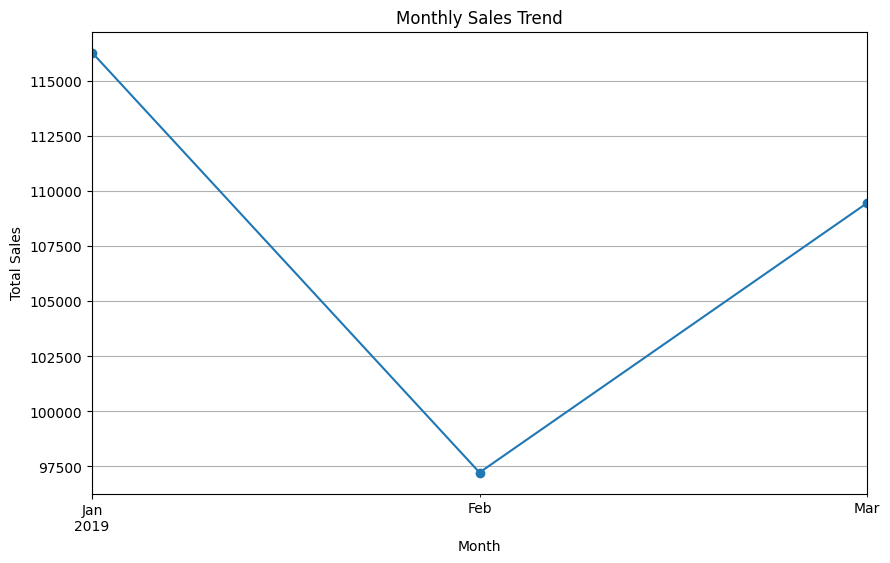

Top Selling Products:
Product_line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Total, dtype: float64

Branch-wise Sales:
Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64

City-wise Sales:
City
Naypyitaw    110568.7065
Yangon       106200.3705
Mandalay     106197.6720
Name: Total, dtype: float64

Customer Type-wise Sales:
Customer_type
Member    164223.444
Normal    158743.305
Name: Total, dtype: float64

Gender-wise Sales:
Gender
Female    167882.925
Male      155083.824
Name: Total, dtype: float64



In [6]:
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("Amazon.csv")

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Time Series Analysis
monthly_sales = data.groupby(data['Date'].dt.to_period('M'))['Total'].sum()
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# Product Performance
top_selling_products = data.groupby('Product_line')['Total'].sum().sort_values(ascending=False)
print("Top Selling Products:")
print(top_selling_products)
print()

# Branch/City Analysis
branch_sales = data.groupby('Branch')['Total'].sum()
city_sales = data.groupby('City')['Total'].sum().sort_values(ascending=False)
print("Branch-wise Sales:")
print(branch_sales)
print("\nCity-wise Sales:")
print(city_sales)
print()

# Customer Type/Gender Analysis
customer_type_sales = data.groupby('Customer_type')['Total'].sum()
gender_sales = data.groupby('Gender')['Total'].sum()
print("Customer Type-wise Sales:")
print(customer_type_sales)
print("\nGender-wise Sales:")
print(gender_sales)
print()


In [8]:
# Calculate Cost of Goods Sold
data['Cost_of_goods_sold'] = data['Unit_price'] * data['Quantity'] + data['Tax_5%']

# Profitability Analysis
data['Profit'] = data['Total'] - data['Cost_of_goods_sold']
profitability_by_segment = data.groupby('Customer_type')['Profit'].sum()
print("Profitability by Customer Segment:")
print(profitability_by_segment)
print()


Profitability by Customer Segment:
Customer_type
Member   -1.964651e-12
Normal    8.366641e-13
Name: Profit, dtype: float64



In [9]:
# Customer Segmentation
customer_segments = data.groupby(['Customer_type', 'Gender'])['Total'].agg(['count', 'sum', 'mean']).reset_index()
print("Customer Segments:")
print(customer_segments)
print()

# Purchase Trends
purchase_trends = data.groupby('Customer_type')['Total'].agg(['count', 'sum', 'mean'])
print("Purchase Trends:")
print(purchase_trends)
print()

# Profitability Analysis
data['Profit'] = data['Total'] - data['Cost_of_goods_sold']
profitability_by_segment = data.groupby('Customer_type')['Profit'].sum()
print("Profitability by Customer Segment:")
print(profitability_by_segment)
print()


Customer Segments:
  Customer_type  Gender  count         sum        mean
0        Member  Female    261  88146.9435  337.727753
1        Member    Male    240  76076.5005  316.985419
2        Normal  Female    240  79735.9815  332.233256
3        Normal    Male    259  79007.3235  305.047581

Purchase Trends:
               count         sum        mean
Customer_type                               
Member           501  164223.444  327.791305
Normal           499  158743.305  318.122856

Profitability by Customer Segment:
Customer_type
Member   -1.964651e-12
Normal    8.366641e-13
Name: Profit, dtype: float64



In [10]:
# Extract hour from the 'Time' column
data['Hour'] = pd.to_datetime(data['Time']).dt.hour

# Define function to categorize time of day
def categorize_time_of_day(hour):
    if 0 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

# Apply function to create 'timeofday' column
data['timeofday'] = data['Hour'].apply(categorize_time_of_day)

# Display the first few rows to verify
print(data.head())


    Invoice_ID Branch       City Customer_type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product_line  Unit_price  Quantity   Tax_5%     Total  ...  \
0       Health and beauty       74.69         7  26.1415  548.9715  ...   
1  Electronic accessories       15.28         5   3.8200   80.2200  ...   
2      Home and lifestyle       46.33         7  16.2155  340.5255  ...   
3       Health and beauty       58.22         8  23.2880  489.0480  ...   
4       Sports and travel       86.31         7  30.2085  634.3785  ...   

       Time      Payment    cogs  gross_margin_percentage  gross_income  \
0  13:08:00      Ewallet  522.83                 4.761905       26.1415   
1  10:29:00         Cash   76.40                 4

In [12]:
data.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,...,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating,Cost_of_goods_sold,Profit,Hour,timeofday
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,548.9715,1.136868e-13,13,Afternoon
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,10:29:00,Cash,76.40,4.761905,3.8200,9.6,80.2200,1.421085e-14,10,Morning
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,340.5255,0.000000e+00,13,Afternoon
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,489.0480,0.000000e+00,20,Evening
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,634.3785,0.000000e+00,10,Morning


In [13]:
# Extract day name from the 'Date' column
data['dayname'] = pd.to_datetime(data['Date']).dt.day_name()

# Display the first few rows to verify
print(data.head())


    Invoice_ID Branch       City Customer_type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product_line  Unit_price  Quantity   Tax_5%     Total  ...  \
0       Health and beauty       74.69         7  26.1415  548.9715  ...   
1  Electronic accessories       15.28         5   3.8200   80.2200  ...   
2      Home and lifestyle       46.33         7  16.2155  340.5255  ...   
3       Health and beauty       58.22         8  23.2880  489.0480  ...   
4       Sports and travel       86.31         7  30.2085  634.3785  ...   

       Payment    cogs gross_margin_percentage  gross_income  Rating  \
0      Ewallet  522.83                4.761905       26.1415     9.1   
1         Cash   76.40                4.761905        3.

In [14]:
data.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,...,Payment,cogs,gross_margin_percentage,gross_income,Rating,Cost_of_goods_sold,Profit,Hour,timeofday,dayname
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.761905,26.1415,9.1,548.9715,1.136868e-13,13,Afternoon,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.761905,3.8200,9.6,80.2200,1.421085e-14,10,Morning,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,Credit card,324.31,4.761905,16.2155,7.4,340.5255,0.000000e+00,13,Afternoon,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,Ewallet,465.76,4.761905,23.2880,8.4,489.0480,0.000000e+00,20,Evening,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,Ewallet,604.17,4.761905,30.2085,5.3,634.3785,0.000000e+00,10,Morning,Friday


In [15]:
# Extract month name from the 'Date' column
data['monthname'] = pd.to_datetime(data['Date']).dt.month_name()

# Display the first few rows to verify
print(data.head())


    Invoice_ID Branch       City Customer_type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product_line  Unit_price  Quantity   Tax_5%     Total  ...  \
0       Health and beauty       74.69         7  26.1415  548.9715  ...   
1  Electronic accessories       15.28         5   3.8200   80.2200  ...   
2      Home and lifestyle       46.33         7  16.2155  340.5255  ...   
3       Health and beauty       58.22         8  23.2880  489.0480  ...   
4       Sports and travel       86.31         7  30.2085  634.3785  ...   

     cogs gross_margin_percentage gross_income  Rating  Cost_of_goods_sold  \
0  522.83                4.761905      26.1415     9.1            548.9715   
1   76.40                4.761905       3.82

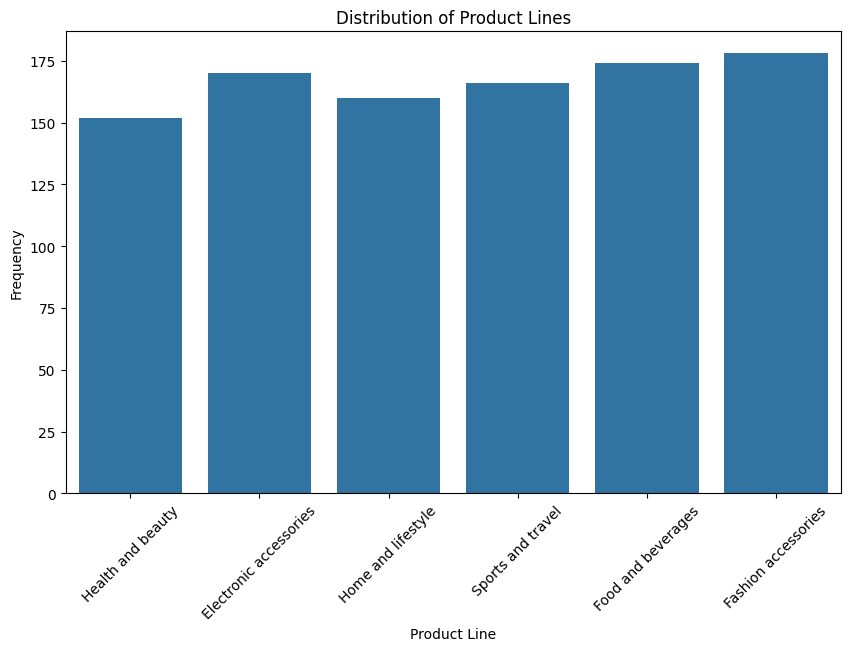

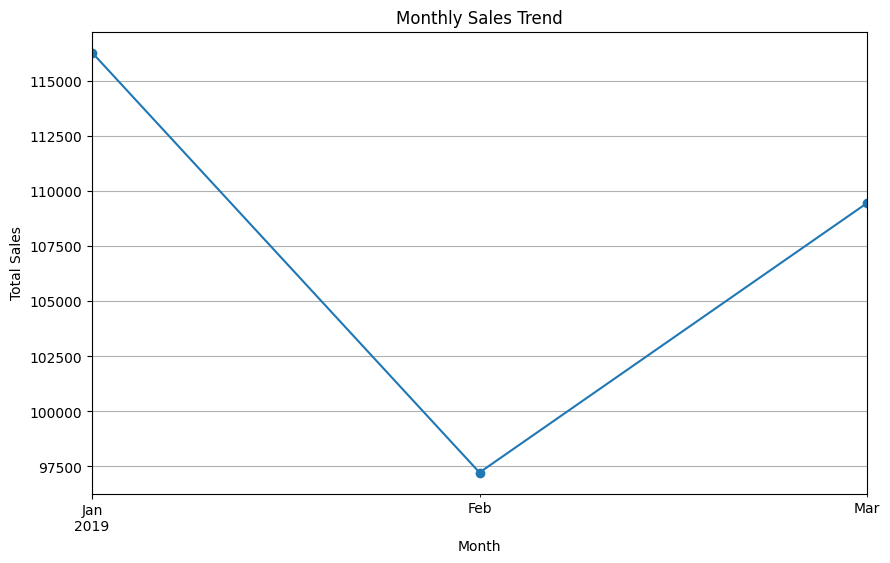

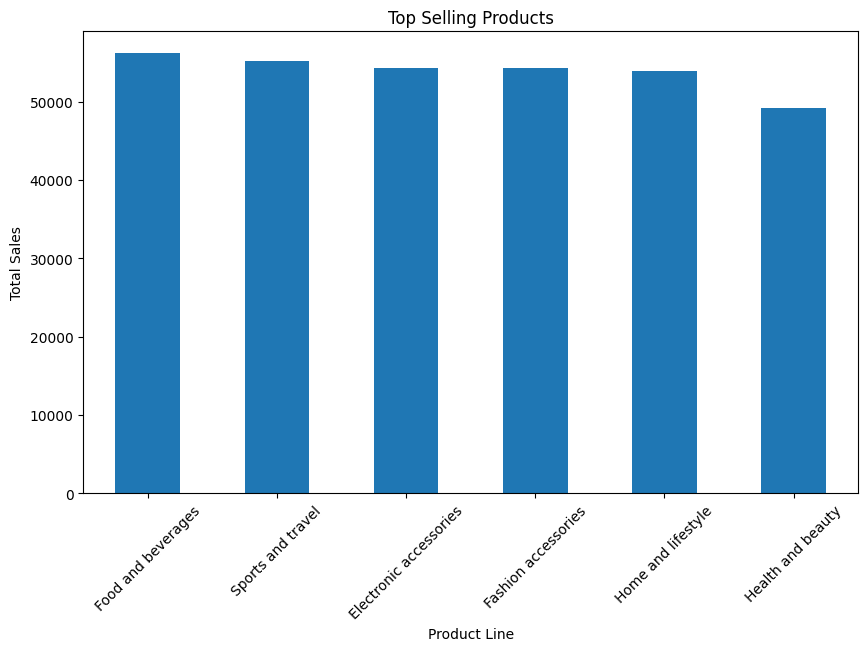

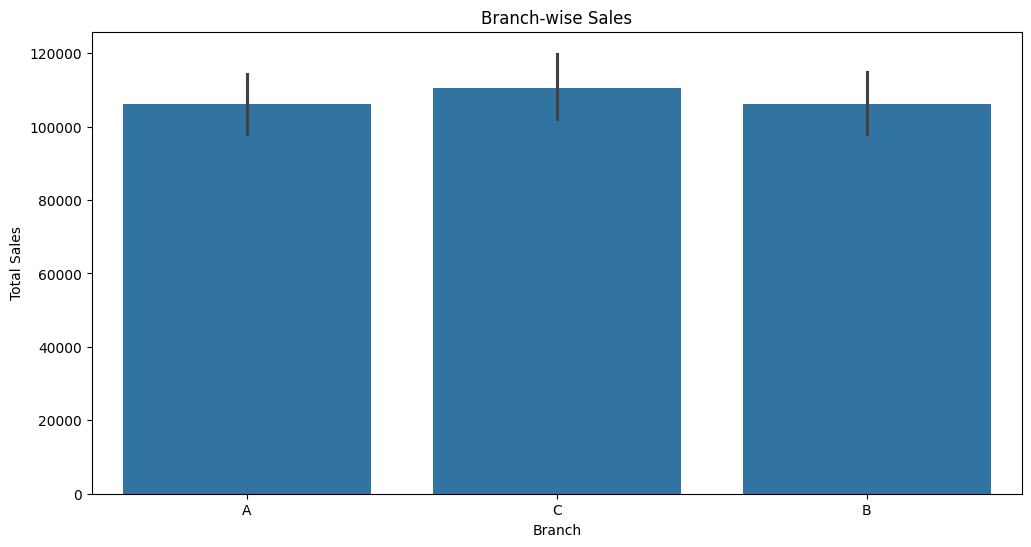

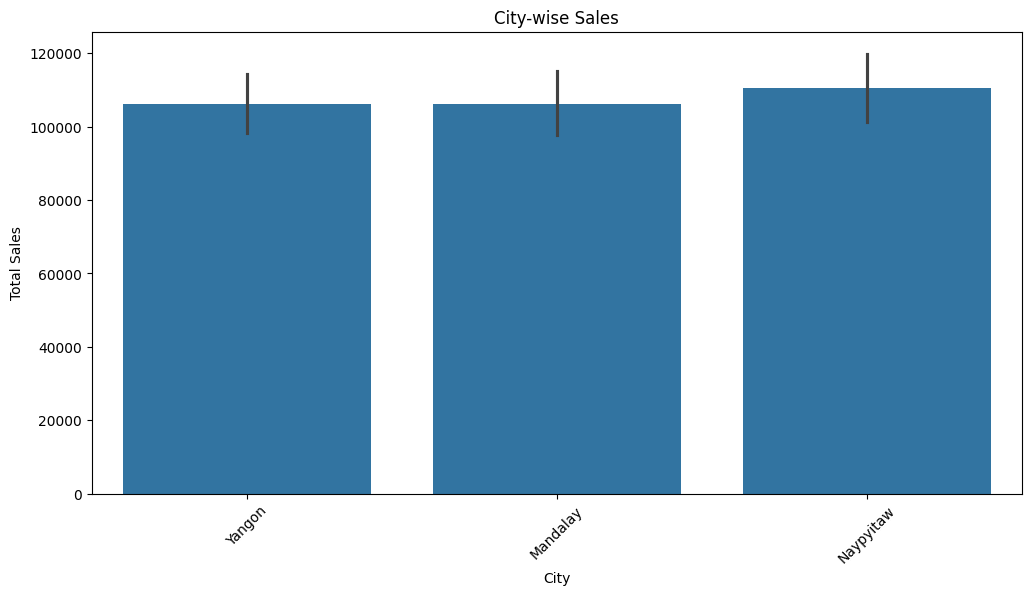

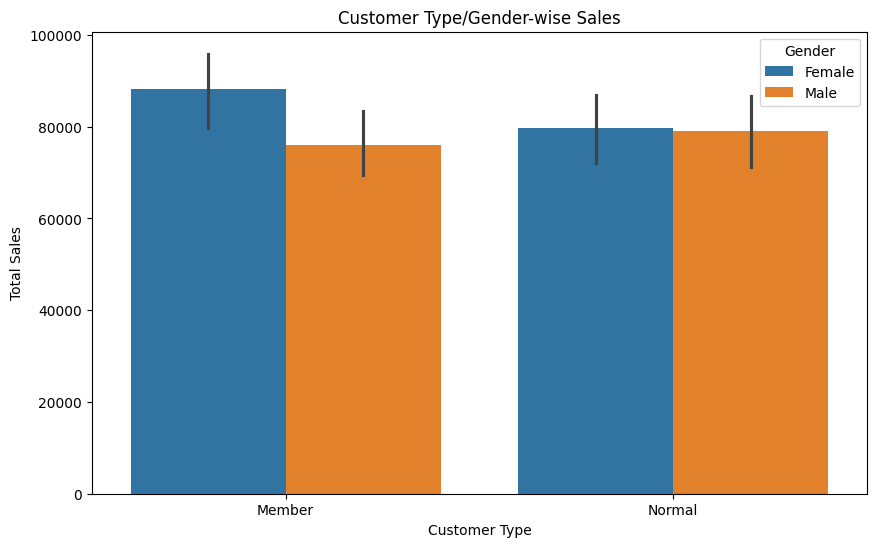

In [17]:
import seaborn as sns

# Distribution of Product Lines
plt.figure(figsize=(10, 6))
sns.countplot(x='Product_line', data=data)
plt.title('Distribution of Product Lines')
plt.xlabel('Product Line')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Sales Trends Over Time
monthly_sales = data.groupby(data['Date'].dt.to_period('M'))['Total'].sum()
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# Top-Selling Products
top_selling_products = data.groupby('Product_line')['Total'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
top_selling_products.plot(kind='bar')
plt.title('Top Selling Products')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Branch/City Analysis
plt.figure(figsize=(12, 6))
sns.barplot(x='Branch', y='Total', data=data, estimator=sum)
plt.title('Branch-wise Sales')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Total', data=data, estimator=sum, order=data['City'].value_counts().index)
plt.title('City-wise Sales')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Customer Type/Gender Analysis
plt.figure(figsize=(10, 6))
sns.barplot(x='Customer_type', y='Total', hue='Gender', data=data, estimator=sum)
plt.title('Customer Type/Gender-wise Sales')
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')
plt.show()


In [18]:
## What is the count of distinct cities in the dataset?

distinct_cities_count = data['City'].nunique()
print("Count of distinct cities in the dataset:", distinct_cities_count)


Count of distinct cities in the dataset: 3


In [19]:
branch_city_mapping = data.groupby('Branch')['City'].unique()
print("Corresponding city for each branch:")
for branch, cities in branch_city_mapping.items():
    print(f"Branch {branch}: {', '.join(cities)}")


Corresponding city for each branch:
Branch A: Yangon
Branch B: Mandalay
Branch C: Naypyitaw


In [20]:
## Count of distinct Product Line

distinct_product_lines_count = data['Product_line'].nunique()
print("Count of distinct product lines in the dataset:", distinct_product_lines_count)


Count of distinct product lines in the dataset: 6


In [21]:
## Most frequent payment method:

most_frequent_payment_method = data['Payment'].mode().values[0]
print("Most frequent payment method:", most_frequent_payment_method)


Most frequent payment method: Ewallet


In [23]:
## Product line with the highest sales:

product_line_highest_sales = data.groupby('Product_line')['Total'].sum().idxmax()
print("Product line with the highest sales:", product_line_highest_sales)


Product line with the highest sales: Food and beverages


In [24]:
monthly_revenue = data.groupby(data['Date'].dt.to_period('M'))['Total'].sum()
print("Revenue generated each month:")
print(monthly_revenue)


Revenue generated each month:
Date
2019-01    116291.868
2019-02     97219.374
2019-03    109455.507
Freq: M, Name: Total, dtype: float64


In [25]:
month_highest_cogs = data.groupby(data['Date'].dt.to_period('M'))['Cost_of_goods_sold'].sum().idxmax().strftime('%B')
print("Month with the highest cost of goods sold:", month_highest_cogs)


Month with the highest cost of goods sold: January


In [26]:
product_line_highest_revenue = data.groupby('Product_line')['Total'].sum().idxmax()
print("Product line with the highest revenue:", product_line_highest_revenue)


Product line with the highest revenue: Food and beverages


In [27]:
city_highest_revenue = data.groupby('City')['Total'].sum().idxmax()
print("City with the highest revenue:", city_highest_revenue)


City with the highest revenue: Naypyitaw


In [28]:
product_line_highest_vat = data.groupby('Product_line')['Tax_5%'].sum().idxmax()
print("Product line with the highest Value Added Tax (VAT):", product_line_highest_vat)


Product line with the highest Value Added Tax (VAT): Food and beverages


In [30]:
average_sales = data['Total'].mean()
data['Sales_Category'] = data['Total'].apply(lambda x: 'Good' if x > average_sales else 'Bad')


In [31]:
data.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,...,gross_margin_percentage,gross_income,Rating,Cost_of_goods_sold,Profit,Hour,timeofday,dayname,monthname,Sales_Category
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,4.761905,26.1415,9.1,548.9715,1.136868e-13,13,Afternoon,Saturday,January,Good
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,4.761905,3.8200,9.6,80.2200,1.421085e-14,10,Morning,Friday,March,Bad
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,4.761905,16.2155,7.4,340.5255,0.000000e+00,13,Afternoon,Sunday,March,Good
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,4.761905,23.2880,8.4,489.0480,0.000000e+00,20,Evening,Sunday,January,Good
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,4.761905,30.2085,5.3,634.3785,0.000000e+00,10,Morning,Friday,February,Good


In [32]:
average_products_sold = data['Quantity'].mean()
branches_exceeding_average = data.groupby('Branch')['Quantity'].sum() > average_products_sold
print("Branches exceeding average number of products sold:")
print(branches_exceeding_average)


Branches exceeding average number of products sold:
Branch
A    True
B    True
C    True
Name: Quantity, dtype: bool


In [33]:
most_frequent_product_line_gender = data.groupby('Gender')['Product_line'].agg(lambda x: x.value_counts().idxmax())
print("Most frequently associated product line for each gender:")
print(most_frequent_product_line_gender)


Most frequently associated product line for each gender:
Gender
Female    Fashion accessories
Male        Health and beauty
Name: Product_line, dtype: object


In [34]:
average_rating_product_line = data.groupby('Product_line')['Rating'].mean()
print("Average rating for each product line:")
print(average_rating_product_line)


Average rating for each product line:
Product_line
Electronic accessories    6.924706
Fashion accessories       7.029213
Food and beverages        7.113218
Health and beauty         7.003289
Home and lifestyle        6.837500
Sports and travel         6.916265
Name: Rating, dtype: float64


In [35]:
sales_occurrences = data.groupby(['timeofday', 'dayname'])['Invoice_ID'].count()
print("Sales occurrences for each time of day on every weekday:")
print(sales_occurrences)


Sales occurrences for each time of day on every weekday:
timeofday  dayname  
Afternoon  Friday       74
           Monday       75
           Saturday     81
           Sunday       70
           Thursday     76
           Tuesday      71
           Wednesday    81
Evening    Friday       36
           Monday       29
           Saturday     55
           Sunday       41
           Thursday     29
           Tuesday      51
           Wednesday    40
Morning    Friday       29
           Monday       21
           Saturday     28
           Sunday       22
           Thursday     33
           Tuesday      36
           Wednesday    22
Name: Invoice_ID, dtype: int64


In [36]:
customer_type_highest_revenue = data.groupby('Customer_type')['Total'].sum().idxmax()
print("Customer type contributing the highest revenue:", customer_type_highest_revenue)


Customer type contributing the highest revenue: Member


In [37]:
city_highest_vat_percentage = (data.groupby('City')['Tax_5%'].sum() / data.groupby('City')['Total'].sum()).idxmax()
print("City with the highest VAT percentage:", city_highest_vat_percentage)


City with the highest VAT percentage: Mandalay


In [38]:
customer_type_highest_vat_payments = data.groupby('Customer_type')['Tax_5%'].sum().idxmax()
print("Customer type with the highest VAT payments:", customer_type_highest_vat_payments)


Customer type with the highest VAT payments: Member


In [39]:
distinct_customer_types_count = data['Customer_type'].nunique()
print("Count of distinct customer types in the dataset:", distinct_customer_types_count)


Count of distinct customer types in the dataset: 2


In [41]:
distinct_payment_methods = data['Payment'].value_counts()
distinct_payment_methods_count = len(distinct_payment_methods)
print("Count of distinct payment methods in the dataset:", distinct_payment_methods_count)
print("Distinct payment methods with their names:")
print(distinct_payment_methods)



Count of distinct payment methods in the dataset: 3
Distinct payment methods with their names:
Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64


In [42]:
most_frequent_customer_type = data['Customer_type'].mode().values[0]
print("Most frequent customer type:", most_frequent_customer_type)


Most frequent customer type: Member


In [43]:
customer_type_highest_purchase_frequency = data['Customer_type'].value_counts().idxmax()
print("Customer type with the highest purchase frequency:", customer_type_highest_purchase_frequency)


Customer type with the highest purchase frequency: Member


In [44]:
predominant_gender = data['Gender'].mode().values[0]
print("Predominant gender among customers:", predominant_gender)


Predominant gender among customers: Female


<Figure size 1000x600 with 0 Axes>

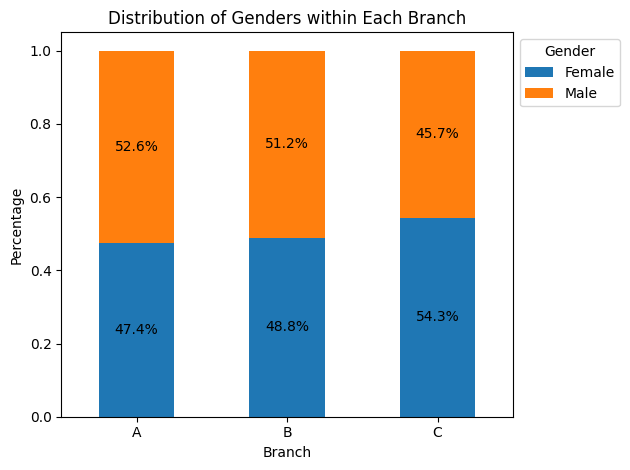

In [47]:
import matplotlib.pyplot as plt

# Grouped bar plot
plt.figure(figsize=(10, 6))
ax = gender_distribution_branch.unstack().plot(kind='bar', stacked=True)
plt.title('Distribution of Genders within Each Branch')
plt.xlabel('Branch')
plt.ylabel('Percentage')
plt.legend(title='Gender', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
plt.tight_layout()

# Annotate each bar with percentages
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1%}', (x + width / 2, y + height / 2), ha='center', va='center')

plt.show()


In [48]:
time_of_day_most_ratings = data.groupby('timeofday')['Rating'].count().idxmax()
print("Time of day with the most ratings:", time_of_day_most_ratings)


Time of day with the most ratings: Afternoon


In [49]:
time_of_day_highest_ratings_branch = data.groupby(['Branch', 'timeofday'])['Rating'].mean().idxmax()
print("Time of day with the highest customer ratings for each branch:", time_of_day_highest_ratings_branch)


Time of day with the highest customer ratings for each branch: ('C', 'Afternoon')


In [50]:
day_highest_average_ratings = data.groupby('dayname')['Rating'].mean().idxmax()
print("Day of the week with the highest average ratings:", day_highest_average_ratings)


Day of the week with the highest average ratings: Monday


In [51]:
day_highest_average_ratings_branch = data.groupby(['Branch', 'dayname'])['Rating'].mean().idxmax()
print("Day of the week with the highest average ratings for each branch:", day_highest_average_ratings_branch)


Day of the week with the highest average ratings for each branch: ('B', 'Monday')
